In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
#import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.spatial import distance
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('cricket_player_stats.csv')

In [3]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0


In [4]:
df.isna().sum().max()

4

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_Test_M',
       'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
       'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
       'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_OD

In [6]:
df = df.drop(columns = ['BT_Test_M',
       'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
       'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
       'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s','BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W', ])

In [7]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,1,0,0,0,0,0,0.0,0.0,0.0,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0


In [8]:
nan2 = df[df.isna().any(axis=1)]
nan2

,Unnamed: 0,name,team,date_of_birth,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W


In [9]:
df[['BT_T20I_Avg', 'BT_T20I_SR']] = df[['BT_T20I_Avg', 'BT_T20I_SR']].fillna(0)

In [10]:
df.isna().sum().max()

0

In [11]:
dobdf = df['date_of_birth'].str.extract(r'(\d{4})')

In [12]:
dobdf = dobdf.fillna(0)
dobdf.tail()

,0
5712,1990
5713,1996
5714,1991
5715,1994
5716,0


In [13]:
df['year'] = dobdf.astype(int)

In [14]:
df

,Unnamed: 0,name,team,date_of_birth,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,1,1,15,12,1,1 for 12,4.80,12.00,15.0,0,0,1973
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,19,1,6,20,0,0 for 20,20.00,0.00,0.0,0,0,1978
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,1,0,0,0,0,0,0.00,0.00,0.0,0,0,1973
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0,0,1974
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0,0,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,5712,Imran Khan,Bahrain,"Apr 01, 1990 (32 years)",7,2,0,0,0,0.00,7,0.00,0,0,0,0,0,7,7,150,202,5,4 for 16,8.08,40.40,30.0,0,0,1990
5713,5713,Shahrukh Quddus,Kuwait,"Dec 11, 1996 (26 years)",1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,24,14,3,3 for 14,3.50,4.67,8.0,0,0,1996
5714,5714,Ateeq Iqbal,Hong Kong,"Dec 10, 1991 (31 years)",1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,6,0,0 for 6,6.00,0.00,0.0,0,0,1991
5715,5715,Ali Zaheer,Kuwait,"Feb 08, 1994 (28 years)",1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.0,0,0,1994


In [15]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_T20I_M',
       'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs', 'BT_T20I_HS',
       'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100', 'BT_T20I_200',
       'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_T20I_M', 'BW_T20I_Inn',
       'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts', 'BW_T20I_BBM',
       'BW_T20I_Econ', 'BW_T20I_Avg', 'BW_T20I_SR', 'BW_T20I_5W',
       'BW_T20I_10W', 'year'],
      dtype='object')

In [16]:
df.drop(['Unnamed: 0', 'date_of_birth'],axis=1,inplace=True)

In [17]:
df.head()

,name,team,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
0,Sachin Tendulkar,India,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0,1973
1,Virender Sehwag,India,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0,1978
2,Rahul Dravid,India,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,1,0,0,0,0,0,0.0,0.0,0.0,0,0,1973
3,VVS Laxman,India,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1974
4,Sourav Ganguly,India,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1972


In [18]:
df1 = df[df['year']>=1986]

In [19]:
df1.tail()

,name,team,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
5711,Sachin Kumar,Bahrain,9,3,1,20,19,10.0,27,74.07,0,0,0,2,0,9,8,138,192,5,2 for 27,8.35,38.40,27.6,0,0,1989
5712,Imran Khan,Bahrain,7,2,0,0,0,0.0,7,0.00,0,0,0,0,0,7,7,150,202,5,4 for 16,8.08,40.40,30.0,0,0,1990
5713,Shahrukh Quddus,Kuwait,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,1,1,24,14,3,3 for 14,3.50,4.67,8.0,0,0,1996
5714,Ateeq Iqbal,Hong Kong,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,1,1,6,6,0,0 for 6,6.00,0.00,0.0,0,0,1991
5715,Ali Zaheer,Kuwait,1,0,0,0,0,0.0,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.0,0,0,1994


In [20]:
df1.shape

(2001, 27)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 91 to 5715
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2001 non-null   object 
 1   team          2001 non-null   object 
 2   BT_T20I_M     2001 non-null   int64  
 3   BT_T20I_Inn   2001 non-null   int64  
 4   BT_T20I_NO    2001 non-null   int64  
 5   BT_T20I_Runs  2001 non-null   int64  
 6   BT_T20I_HS    2001 non-null   int64  
 7   BT_T20I_Avg   2001 non-null   float64
 8   BT_T20I_BF    2001 non-null   int64  
 9   BT_T20I_SR    2001 non-null   float64
 10  BT_T20I_100   2001 non-null   int64  
 11  BT_T20I_200   2001 non-null   int64  
 12  BT_T20I_50    2001 non-null   int64  
 13  BT_T20I_4s    2001 non-null   int64  
 14  BT_T20I_6s    2001 non-null   int64  
 15  BW_T20I_M     2001 non-null   int64  
 16  BW_T20I_Inn   2001 non-null   int64  
 17  BW_T20I_B     2001 non-null   int64  
 18  BW_T20I_Runs  2001 non-null

In [22]:
print(f'Rows in DataFrame before split: {df1.shape[0]}')
t20_cricket_playing_nations = ['Australia', 'England', 'Ireland','India', 'Pakistan', 'New Zealand', 'West Indies', 'South Africa', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'Zimbabwe']
df1 = df1[df1['team'].isin(t20_cricket_playing_nations)]
print(f'Rows in DataFrame after split: {df1.shape[0]}')

Rows in DataFrame before split: 2001
Rows in DataFrame after split: 986


In [23]:
df = df1

In [24]:
df.head()

,name,team,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,year
91,Elton Chigumbura,Zimbabwe,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,4 for 31,9.40,28.86,18.43,0,0,1986
96,Brendan Taylor,Zimbabwe,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,1 for 16,3.40,17.00,30.00,0,0,1986
101,Nazmul Hossain,Bangladesh,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,1 for 15,9.57,67.00,42.00,0,0,1987
150,Graeme Cremer,Zimbabwe,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,3 for 11,6.95,18.86,16.29,0,0,1986
158,Zulqarnain Haider,Pakistan,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0,0.00,0.00,0.00,0,0,1986


In [25]:
df = df.loc[(df['BT_T20I_M']> 0) | (df['BW_T20I_M']> 0)]

In [26]:
df.shape

(631, 27)

In [27]:
df['BT_T20I_SR'].describe()

count    631.000000
mean      97.927005
std       49.031868
min        0.000000
25%       75.000000
50%      108.370000
75%      129.025000
max      333.330000
Name: BT_T20I_SR, dtype: float64

In [28]:
def boundary_rate(player):
    num_of_fours = player['BT_T20I_4s']
    num_of_sixes = player['BT_T20I_6s']
    balls_faced = player['BT_T20I_BF']
    if (balls_faced > (num_of_fours + num_of_sixes)):
        return round((num_of_fours + num_of_sixes) / balls_faced, 3)
    else:
        return 0
    
df['BT_T20I_BR'] = df.apply(lambda row: boundary_rate(row), axis=1)

In [29]:
df2 = df[(np.abs(stats.zscore(df['BT_T20I_BR'])) > 3)]
print(df2.shape)
df2[["name", "year", "BT_T20I_M", "BT_T20I_Runs","team", "BT_T20I_BF", "BT_T20I_SR", "BT_T20I_BR"]]

(5, 28)


,name,year,BT_T20I_M,BT_T20I_Runs,team,BT_T20I_BF,BT_T20I_SR,BT_T20I_BR
3945,Matt Henry,1991,6,10,New Zealand,5,200.00,0.400
4040,Dane Paterson,1989,8,5,South Africa,2,250.00,0.500
4315,Asitha Fernando,1997,3,10,Sri Lanka,3,333.33,0.667
4412,Wihan Lubbe,1992,2,16,South Africa,10,160.00,0.400
4701,Ravi Bishnoi,2000,10,10,India,4,250.00,0.500


In [30]:
df.drop(df2.index,axis=0,inplace=True)

In [31]:
df.shape

(626, 28)

In [32]:
df.columns

Index(['name', 'team', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO',
       'BT_T20I_Runs', 'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR',
       'BT_T20I_100', 'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s',
       'BW_T20I_M', 'BW_T20I_Inn', 'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts',
       'BW_T20I_BBM', 'BW_T20I_Econ', 'BW_T20I_Avg', 'BW_T20I_SR',
       'BW_T20I_5W', 'BW_T20I_10W', 'year', 'BT_T20I_BR'],
      dtype='object')

In [33]:
tdf = df[['name', 'team', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO',
       'BT_T20I_Runs', 'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR',
       'BT_T20I_100', 'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s',
       'BW_T20I_M', 'BW_T20I_Inn', 'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts',
       'BW_T20I_BBM', 'BW_T20I_Econ', 'BW_T20I_Avg', 'BW_T20I_SR',
       'BW_T20I_5W', 'BW_T20I_10W', 'BT_T20I_BR']]

In [34]:
tdf

,name,team,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR
91,Elton Chigumbura,Zimbabwe,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,4 for 31,9.40,28.86,18.43,0,0,0.176
96,Brendan Taylor,Zimbabwe,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,1 for 16,3.40,17.00,30.00,0,0,0.145
101,Nazmul Hossain,Bangladesh,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,1 for 15,9.57,67.00,42.00,0,0,0.000
150,Graeme Cremer,Zimbabwe,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,3 for 11,6.95,18.86,16.29,0,0,0.020
158,Zulqarnain Haider,Pakistan,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0,0.00,0.00,0.00,0,0,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Clive Madande,Zimbabwe,1,1,0,2,2,2.00,11,18.18,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.00,0,0,0.000
5239,Munim Shahriar,Bangladesh,5,5,0,34,17,6.80,47,72.34,0,0,0,5,0,5,0,0,0,0,0,0.00,0.00,0.00,0,0,0.106
5240,Justin Broad,South Africa,9,9,2,288,62,41.14,241,119.50,0,0,3,26,3,9,6,69,93,1,1 for 9,8.09,93.00,69.00,0,0,0.120
5322,John Masara,Zimbabwe,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,5,0,0 for 5,5.00,0.00,0.00,0,0,0.000


In [35]:
tdf.drop(['team'],axis=1,inplace=True)

In [36]:
tdf.head()

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,4 for 31,9.40,28.86,18.43,0,0,0.176
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,1 for 16,3.40,17.00,30.00,0,0,0.145
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,1 for 15,9.57,67.00,42.00,0,0,0.000
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,3 for 11,6.95,18.86,16.29,0,0,0.020
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0,0.00,0.00,0.00,0,0,0.033


In [37]:
def conversion(str):
    if str != '0':
        try:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            k = nl[0]/nl[1]
            return k
        except:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            if nl[0] !=0:
                return nl[0]
            else:
                return 0
    else:
        return 0

In [38]:
tdf['BW_T20I_BBM'] = tdf['BW_T20I_BBM'].apply(conversion)

In [39]:
tdf.head()

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,0.129032,9.40,28.86,18.43,0,0,0.176
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,0.062500,3.40,17.00,30.00,0,0,0.145
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,0.066667,9.57,67.00,42.00,0,0,0.000
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,0.272727,6.95,18.86,16.29,0,0,0.020
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.033


In [40]:
tdf.shape

(626, 26)

In [41]:
tdf['mor_cols'] = tdf['BT_T20I_NO']+ tdf['BT_T20I_Runs']+ tdf['BT_T20I_HS']+ tdf['BT_T20I_Avg']+\
                tdf['BT_T20I_SR'] + tdf['BT_T20I_100']+ tdf['BT_T20I_200']+ tdf['BT_T20I_50']+\
                tdf['BT_T20I_4s']+ tdf['BT_T20I_6s']+ tdf['BW_T20I_Wkts'] + tdf['BW_T20I_5W'] + tdf['BW_T20I_10W']+tdf['BT_T20I_BR']

tdf['less_cols'] = tdf['BW_T20I_Runs'] + tdf['BW_T20I_Econ'] + tdf['BW_T20I_Avg'] + tdf['BW_T20I_SR']

In [42]:
tdf['impact_col'] = np.sqrt(tdf['mor_cols']/tdf['less_cols'])

In [43]:
tdf.head()

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,0.129032,9.40,28.86,18.43,0,0,0.176,1209.686,460.69,1.620436
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,0.062500,3.40,17.00,30.00,0,0,0.145,1175.165,67.40,4.175606
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,0.066667,9.57,67.00,42.00,0,0,0.000,29.000,185.57,0.395317
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,0.272727,6.95,18.86,16.29,0,0,0.020,199.920,702.10,0.533616
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.033,125.373,0.00,inf


In [44]:
df3 = tdf[(tdf['BT_T20I_Inn'] == 0) & (tdf['BW_T20I_Inn'] == 0)]

In [45]:
df3

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,mor_cols,less_cols,impact_col
3642,Ben Foakes,1,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
4611,Sinethemba Qeshile,2,0,0,0,0,0.0,0,0.0,0,0,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN


In [46]:
tdf.drop(df3.index,axis=0,inplace=True)

In [47]:
tdf

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,0.129032,9.40,28.86,18.43,0,0,0.176,1209.686,460.69,1.620436
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,0.062500,3.40,17.00,30.00,0,0,0.145,1175.165,67.40,4.175606
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,0.066667,9.57,67.00,42.00,0,0,0.000,29.000,185.57,0.395317
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,0.272727,6.95,18.86,16.29,0,0,0.020,199.920,702.10,0.533616
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.033,125.373,0.00,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Clive Madande,1,1,0,2,2,2.00,11,18.18,0,0,0,0,0,1,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.000,24.180,0.00,inf
5239,Munim Shahriar,5,5,0,34,17,6.80,47,72.34,0,0,0,5,0,5,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.106,135.246,0.00,inf
5240,Justin Broad,9,9,2,288,62,41.14,241,119.50,0,0,3,26,3,9,6,69,93,1,0.111111,8.09,93.00,69.00,0,0,0.120,545.760,263.09,1.440286
5322,John Masara,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,5,0,0.000000,5.00,0.00,0.00,0,0,0.000,0.000,10.00,0.000000


In [48]:
tdf.shape

(624, 29)

In [49]:
tdf = tdf.replace([np.inf,np.nan],100)

In [50]:
tdf

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,mor_cols,less_cols,impact_col
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,0.129032,9.40,28.86,18.43,0,0,0.176,1209.686,460.69,1.620436
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,0.062500,3.40,17.00,30.00,0,0,0.145,1175.165,67.40,4.175606
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,0.066667,9.57,67.00,42.00,0,0,0.000,29.000,185.57,0.395317
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,0.272727,6.95,18.86,16.29,0,0,0.020,199.920,702.10,0.533616
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.033,125.373,0.00,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Clive Madande,1,1,0,2,2,2.00,11,18.18,0,0,0,0,0,1,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.000,24.180,0.00,100.000000
5239,Munim Shahriar,5,5,0,34,17,6.80,47,72.34,0,0,0,5,0,5,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.106,135.246,0.00,100.000000
5240,Justin Broad,9,9,2,288,62,41.14,241,119.50,0,0,3,26,3,9,6,69,93,1,0.111111,8.09,93.00,69.00,0,0,0.120,545.760,263.09,1.440286
5322,John Masara,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0,1,1,6,5,0,0.000000,5.00,0.00,0.00,0,0,0.000,0.000,10.00,0.000000


In [51]:
tdf.drop(['mor_cols', 'less_cols'], axis=1, inplace=True)

In [52]:
tdf.columns

Index(['name', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_T20I_M',
       'BW_T20I_Inn', 'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts',
       'BW_T20I_BBM', 'BW_T20I_Econ', 'BW_T20I_Avg', 'BW_T20I_SR',
       'BW_T20I_5W', 'BW_T20I_10W', 'BT_T20I_BR', 'impact_col'],
      dtype='object')

In [53]:
tdf_col = ['BT_T20I_NO', 'BT_T20I_Runs','BT_T20I_HS', 'BT_T20I_Avg', 
           'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100','BT_T20I_200', 
           'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s','BW_T20I_B', 
           'BW_T20I_Runs', 'BW_T20I_Wkts','BW_T20I_BBM', 'BW_T20I_Econ', 
           'BW_T20I_Avg', 'BW_T20I_SR','BW_T20I_5W', 'BW_T20I_10W', 'BT_T20I_BR', 'impact_col']

In [54]:
tdf.isna().sum().max()

0

In [58]:
nam = list(tdf.name)
t20_players = sorted(nam)
t20_players

['Aamer Yamin',
 'Aaron Finch',
 'Abdullah Shafique',
 'Abu Hider Rony',
 'Abu Jayed',
 'Abul Hasan',
 'Adam Milne',
 'Adam Zampa',
 'Adil Rashid',
 'Adrian Barath',
 'Afif Hossain',
 'Afsar Zazai',
 'Aftab Alam',
 'Ahmed Shehzad',
 'Ahsan Ali',
 'Aiden Markram',
 'Ainsley Ndlovu',
 'Ajaz Patel',
 'Ajinkya Rahane',
 'Akeal Hosein',
 'Akila Dananjaya',
 'Al-Amin Hossain',
 'Alex Carey',
 'Alex Hales',
 'Alpesh Ramjani',
 'Alzarri Joseph',
 'Amila Aponso',
 'Aminul Islam',
 'Amir Hamza',
 'Anamul Haque',
 'Andile Phehlukwayo',
 'Andre Fletcher',
 'Andre McCarthy',
 'Andre Russell',
 'Andrew Balbirnie',
 'Andrew Poynter',
 'Andrew Tye',
 'Andy McBrine',
 'Angelo Mathews',
 'Angelo Perera',
 'Anna Kerrison',
 'Anrich Nortje',
 'Anwar Ali',
 'Arafat Sunny',
 'Ariful Haque',
 'Arshad Iqbal',
 'Arshdeep Singh',
 'Asad Ali',
 'Asad Shafiq',
 'Asela Gunaratne',
 'Asghar Afghan',
 'Ashan Priyanjan',
 'Ashen Bandara',
 'Ashley Nurse',
 'Ashton Agar',
 'Ashton Turner',
 'Asif Ali',
 'Avesh Khan',


In [55]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1,15):
    kmeans = KMeans(n_clusters = n, random_state = 8)
    kmeans.fit(tdf[tdf_col])
    inertia.append(kmeans.inertia_)

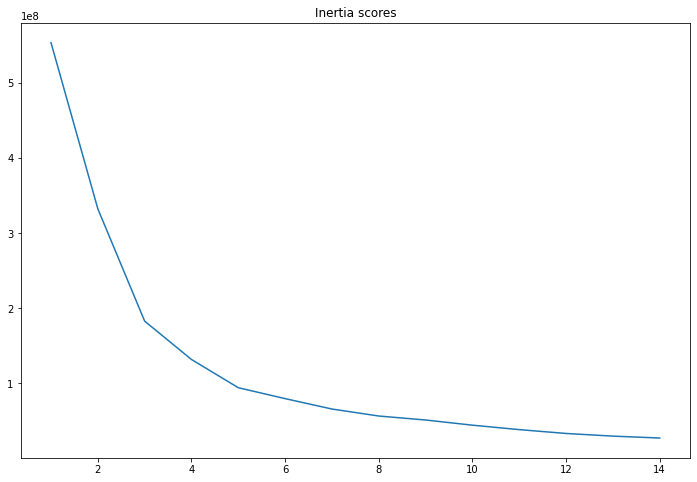

In [56]:
plt.figure(figsize= (12,8))
plt.plot(range(1,15),inertia)
plt.title('Inertia scores')
plt.show()

In [57]:
kmeans = KMeans(n_clusters = 5, random_state = 8)
tdf['cluster'] = kmeans.fit_predict(tdf[tdf_col])

In [58]:
tdf.head()

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,impact_col,cluster
91,Elton Chigumbura,56,55,8,864,54,18.38,621,139.13,0,0,3,56,53,56,20,258,404,14,0.129032,9.40,28.86,18.43,0,0,0.176,1.620436,1
96,Brendan Taylor,44,44,5,859,60,22.03,747,114.99,0,0,5,87,21,44,2,30,17,1,0.062500,3.40,17.00,30.00,0,0,0.145,4.175606,1
101,Nazmul Hossain,4,2,2,3,3,0.00,15,20.00,0,0,0,0,0,4,4,42,67,1,0.066667,9.57,67.00,42.00,0,0,0.000,0.395317,3
150,Graeme Cremer,29,19,6,68,17,5.23,102,66.67,0,0,0,2,0,29,28,570,660,35,0.272727,6.95,18.86,16.29,0,0,0.020,0.533616,0
158,Zulqarnain Haider,3,3,0,23,17,7.67,30,76.67,0,0,0,1,0,3,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.033,100.000000,3


In [59]:
tdf.columns

Index(['name', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_T20I_M',
       'BW_T20I_Inn', 'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts',
       'BW_T20I_BBM', 'BW_T20I_Econ', 'BW_T20I_Avg', 'BW_T20I_SR',
       'BW_T20I_5W', 'BW_T20I_10W', 'BT_T20I_BR', 'impact_col', 'cluster'],
      dtype='object')

In [60]:
tdf.cluster.value_counts()

3    387
0    102
1     73
2     44
4     18
Name: cluster, dtype: int64

In [61]:
df_cl1 = tdf[tdf['cluster'] == 0]
df_cl2 = tdf[tdf['cluster'] == 1]
df_cl3 = tdf[tdf['cluster'] == 2]
df_cl4 = tdf[tdf['cluster'] == 3]
df_cl5 = tdf[tdf['cluster'] == 4]


In [62]:
print(df_cl1.shape,df_cl2.shape,df_cl3.shape,df_cl4.shape,df_cl5.shape)

(102, 28) (73, 28) (44, 28) (387, 28) (18, 28)


In [63]:
def get_df(name):
    for df in [df_cl1,df_cl2,df_cl3,df_cl4,df_cl5]:
        if any(np.isin(df.name.values,name) == True):
            return df
        else:
            pass

def player_recommendation(name):
    recommendation = []
    r_df = get_df(name)
    a = r_df.loc[r_df['name'] == name][tdf_col]
    a = np.array(a)
    for num in r_df.index:
        b = r_df.loc[r_df.index == num][tdf_col]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([r_df.loc[r_df.index == num]['name'],c])
        recommendation.sort(key = lambda a: a[1])
    return [recommendation[1][0].values[0], recommendation[2][0].values[0], recommendation[3][0].values[0], recommendation[4][0].values[0]]

In [64]:
get_df('Virat Kohli')

,name,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W,BT_T20I_BR,impact_col,cluster
314,Rohit Sharma,148,140,15,3853,118,30.82,2767,139.25,4,0,29,348,182,148,9,68,113,1,0.045455,9.97,113.00,68.00,0,0,0.192,3.940648,4
350,Eoin Morgan,115,106,20,2458,91,28.58,1805,136.18,0,0,14,186,120,115,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.170,100.000000,4
499,Paul Stirling,121,120,8,3181,115,28.40,2360,134.79,1,0,21,360,118,121,41,522,647,20,0.142857,7.44,32.35,26.10,0,0,0.203,2.365012,4
506,Mahmudullah,121,113,23,2121,64,23.57,1810,117.18,0,0,6,161,64,121,70,845,1012,38,0.300000,7.19,26.63,22.24,0,0,0.124,1.565585,4
558,Virat Kohli,115,107,31,4008,122,52.74,2905,137.97,1,0,37,356,117,115,13,152,204,4,0.076923,8.05,51.00,38.00,0,0,0.163,4.020737,4
596,Martin Guptill,122,118,7,3531,105,31.81,2602,135.70,2,0,20,310,173,122,1,6,11,0,0.000000,11.00,0.00,0.00,0,0,0.186,14.005999,4
640,Aaron Finch,103,103,12,3120,172,34.29,2189,142.53,2,0,19,309,125,103,2,12,27,0,0.000000,13.50,0.00,0.00,0,0,0.198,9.858277,4
666,David Warner,99,99,11,2894,100,32.89,2048,141.31,1,0,24,296,105,99,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.196,100.000000,4
832,Jos Buttler,103,95,20,2602,101,34.69,1804,144.24,1,0,19,233,108,103,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.189,100.000000,4
858,Mohammad Shahzad,69,69,3,1961,118,29.71,1464,133.95,1,0,11,217,75,69,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.199,100.000000,4


In [65]:
player_recommendation('Virat Kohli')

['Rohit Sharma', 'Martin Guptill', 'Babar Azam', 'Paul Stirling']

In [66]:
import pickle

with open('t20_player.pkl', 'wb') as f:
    pickle.dump(player_recommendation, f)


In [67]:
pl_list = ['Rohit Sharma','David Warner','Jos Buttler','Virat Kohli','Ben Stokes','Ravindra Jadeja',
           'Rashid Khan','Jasprit Bumrah','Mohammed Siraj','Pat Cummins','Kagiso Rabada']

def team_recom(pl_list):
    opp_list = []

    for x in pl_list:
        new_pls = player_recommendation(x)
        if ((new_pls[0] not in opp_list) and (new_pls[0] not in pl_list)):
            opp_list.append(new_pls[0])
        elif ((new_pls[1] not in opp_list) and (new_pls[1] not in pl_list)):
            opp_list.append(new_pls[1])
        elif ((new_pls[2] not in opp_list) and (new_pls[2] not in pl_list)):
            opp_list.append(new_pls[2])
        else:
            opp_list.append(new_pls[3])
    return opp_list

In [68]:
team_recom(pl_list)


['Martin Guptill',
 'Mohammad Rizwan',
 'Eoin Morgan',
 'Babar Azam',
 'Gulbadin Naib',
 'Mark Adair',
 'Mitchell Santner',
 'Tabraiz Shamsi',
 'Dominic Drakes',
 'Craig Young',
 'Haris Rauf']

In [69]:
with open('t20_team.pkl', 'wb') as f:
    pickle.dump(team_recom, f)



In [71]:
with open('t20_player.pkl','rb') as f:
    my_func = pickle.load(f)

In [72]:
my_func('Rohit Sharma')

['Virat Kohli', 'Martin Guptill', 'Babar Azam', 'Aaron Finch']